In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, colors

import pandas
print(pandas.__version__)

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 245    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [2*fig_width, 2*fig_height]
rcParams.update({'figure.figsize': fig_size})

1.1.5


In [2]:
def extract_forecasts(data, forecast_period):
    
    dates = []
    dates_pivot = []
    data_quantile_0025_cont = []
    data_quantile_0975_cont = []
    data_point_cont = []
    
    for file in sorted(os.listdir(ensemble_forecast_directory))[7:]:    

        if file[-4:] == '.csv':
            
            print(f"importing{ensemble_forecast_directory+file}")
            data = pd.read_csv(ensemble_forecast_directory+file)
            
            data = data[data['location'] == 'US']
                
            data_quantile = data[data['type'] == 'quantile']
                        
            data_quantile_0025 = data[data['quantile'] == 0.025]    
            data_quantile_0975 = data[data['quantile'] == 0.975]     
            
            data_point = data[data['type'] == 'point']
            
            dates_pivot.append(data_point[data_point['target'] == forecast_period]['forecast_date'].to_numpy()[0])
            
            dates.append(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['target_end_date'].to_numpy()[0])
            data_quantile_0025_cont.append(float(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['value']))
            data_quantile_0975_cont.append(float(data_quantile_0975[data_quantile_0975['target'] == forecast_period]['value']))
            data_point_cont.append(float(data_point[data_point['target'] == forecast_period]['value']))
    
    dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
    dates_pivot = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_pivot]
    
    return np.asarray(dates), np.asarray(dates_pivot), np.asarray(data_quantile_0025_cont), np.asarray(data_quantile_0975_cont), np.asarray(data_point_cont)

In [3]:
covid_data = pd.read_csv('../../data/Covid19_ground_truth_reports/fetched_Dec_2021/time_series_covid19_deaths_US.csv')

print(covid_data.head())
colnames = covid_data.columns.tolist()

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 12/19/21  12/20/21  12/21/21  12/22/21  12/23/21  \
0  32.539527 -86.644082  ...      159       159       160       160       160   
1  30.727750 -87.722071  ...      592       592       592       593       593   
2  31.868263 -85.387129  ...       81        81        81        81        81   
3  32.996421 -87.125115  ...       95        95        95        95        95   
4  33.982109 -86.567906  ...      195       195       197       197       197   

   12/24/21  12/25/21  12/26/21  12/27

2020-01-22 00:00:00 2021-12-28 00:00:00


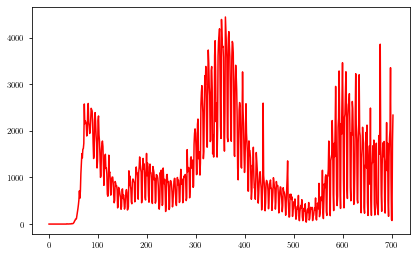

In [4]:
start = datetime.datetime.strptime(colnames[12], "%m/%d/%y")
end = datetime.datetime.strptime(colnames[-1], "%m/%d/%y")

print(start, end)

dates_covid_data = np.asarray([start + datetime.timedelta(days=x) for x in range(0, (end-start).days)])
dates_covid_data = dates_covid_data[3:][::7]

deaths_covid_data = [covid_data.iloc[:,i].sum() for i in range(12,len(colnames))]
deaths_covid_data_dates = [colnames[i] for i in range(12,len(colnames))]

original_cum_signal = deaths_covid_data[3:]
deaths_covid_data = np.diff(deaths_covid_data[3:])
plt.plot(deaths_covid_data,'r')

original_signal = deaths_covid_data
original_signal_dates = deaths_covid_data_dates[4:]

In [5]:
ensemble_forecast_directory = '../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/'

dates_1wk, dates_forecast_1wk, data_quantile_0025_1wk, data_quantile_0975_1wk, data_point_1wk = \
extract_forecasts(ensemble_forecast_directory, '1 wk ahead inc death')

dates_2wk, dates_forecast_2wk, data_quantile_0025_2wk, data_quantile_0975_2wk, data_point_2wk = \
extract_forecasts(ensemble_forecast_directory, '2 wk ahead inc death')

dates_3wk, dates_forecast_3wk, data_quantile_0025_3wk, data_quantile_0975_3wk, data_point_3wk = \
extract_forecasts(ensemble_forecast_directory, '3 wk ahead inc death')

dates_4wk, dates_forecast_4wk, data_quantile_0025_4wk, data_quantile_0975_4wk, data_point_4wk = \
extract_forecasts(ensemble_forecast_directory, '4 wk ahead inc death')

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-03-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-10-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-17-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-24-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-31-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-07-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-14-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-21-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2021-12-27-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-03-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-10-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-17-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-24-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-31-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-07-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-14-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-17-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-24-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-31-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-07-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-14-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-21-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-28-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-05-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-24-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-31-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-07-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-14-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-21-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-28-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-05-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-12-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

In [8]:
for i in range(0,len(dates_4wk)):
    print(f"target:{dates_4wk[i]}|forecast:{dates_forecast_4wk[i]}|value:{data_point_4wk[i]}|data_quantile_0025_4wk:{data_quantile_0025_4wk[i]}")

target:2020-08-29 00:00:00|forecast:2020-08-03 00:00:00|value:9334.0|data_quantile_0025_4wk:4703.0
target:2020-09-05 00:00:00|forecast:2020-08-10 00:00:00|value:8575.0|data_quantile_0025_4wk:2249.0
target:2020-09-12 00:00:00|forecast:2020-08-17 00:00:00|value:7707.0|data_quantile_0025_4wk:4889.0
target:2020-09-19 00:00:00|forecast:2020-08-24 00:00:00|value:5985.0|data_quantile_0025_4wk:2761.0
target:2020-09-26 00:00:00|forecast:2020-08-31 00:00:00|value:4872.0|data_quantile_0025_4wk:804.0
target:2020-10-03 00:00:00|forecast:2020-09-07 00:00:00|value:4604.0|data_quantile_0025_4wk:818.0
target:2020-10-10 00:00:00|forecast:2020-09-14 00:00:00|value:3273.0|data_quantile_0025_4wk:1237.0
target:2020-10-17 00:00:00|forecast:2020-09-21 00:00:00|value:3385.0|data_quantile_0025_4wk:1644.0
target:2020-10-24 00:00:00|forecast:2020-09-28 00:00:00|value:4374.0|data_quantile_0025_4wk:2673.0
target:2020-10-31 00:00:00|forecast:2020-10-05 00:00:00|value:4309.0|data_quantile_0025_4wk:2888.0
target:2020-

In [29]:
def euler_lagrange(signal_cum_df__, weeks__ = 1, diff_length__ = 7):
    assert signal_cum_df__[-1]>signal_cum_df__[-2] # monotone increasing check
    
    print("euler-lagrange method input:", signal_cum_df__.tail())
    
    # get discrete derivative [diff_length__] of signal_cum_df_ -- cumulative numbers -- less noisy)
    derivative_week_discrete = signal_cum_df__[-1] - signal_cum_df__[-diff_length__]  
    print(f"euler-lagrange derivative{signal_cum_df__[-1]}-{signal_cum_df__[-diff_length__]}=", derivative_week_discrete)
    
    # total variation optimization to denoise 2nd derivative 
    xinv = extract_min_total_variation_optimization(signal_cum_df__.to_numpy())
    
    
    # 2nd derivative after total variation optimization 
    derivative__2nd_weekly = (xinv[-1] - xinv[-diff_length__])
    print("euler-lagrange 2nd derivative:", derivative__2nd_weekly)
            
    derivative_corr =  weeks__*derivative__2nd_weekly
    print("number of weeks to future and correction", weeks__, derivative_corr)
    euler_lagrange_pred = derivative_week_discrete + derivative_corr
    
    return euler_lagrange_pred


import pylops
def extract_min_total_variation_optimization(original_signal__):
    y = np.diff(original_signal__)
    nx = len(y)
    Iop = pylops.Identity(nx)
    
    # Model: y = Iop*(x + n), n - noise, 
    # xinv = argmin ||y-Ix||_2 + lambda*||\grad[x]||_2
    
    D2op = pylops.SecondDerivative(nx, edge=True)
    lamda = 1e5
    xinv = pylops.optimization.leastsquares.RegularizedInversion(Iop, [D2op], y,
                                                          epsRs=[np.sqrt(lamda/2)],
                                                          **dict(iter_lim=30))
    
    return xinv

In [30]:
def error_comparison_all_raw(covid_data_raw__, cdc_ensemble_forecast__, cdc_dates__, weeks__):
    # total variation on derivative + reconstruction minimization ~ Euler-Lagrange 
    div = 1
    error_euler = []
    error_ensemble = []
    error_date = []
    euler_pred_list = []
    cdc_pred_list = []
    pivot_date = []
    ground_truth_list = []
    for i in range(len(cdc_dates__)):
        date_tmp = cdc_dates__[i]
        print("<<<prediction date", date_tmp.strftime("%-m/%-d/%y"))
        ind = np.where(covid_data_raw__.columns == date_tmp.strftime("%-m/%-d/%y"))
        if len(ind[0]):
            error_date.append(date_tmp)
            ind = ind[0][0]
            
            print("ind element on covid data",ind,  covid_data.iloc[:,ind].sum())
            
            current_week_slice = covid_data.iloc[:,ind-7+1:ind+1].sum()
            print("current week (prediction week)", current_week_slice)
            
            current_week_death_diff = current_week_slice[-1]-current_week_slice[0]
            print("current week dead diff", current_week_death_diff)
 
            all_history_slice = covid_data.iloc[:,12:ind-7*weeks__+1+1].sum()
            print("historical slice",all_history_slice.tail(14))
            print("last date history", all_history_slice.index[-1])
            pivot_date.append( datetime.datetime.strptime(all_history_slice.index[-1], "%m/%d/%y") )
        
            euler_pred = euler_lagrange(all_history_slice, weeks__)
            euler_pred_list.append(euler_pred)
            print("euler pred with dedicated function", euler_pred)
            
            error_euler.append(abs(euler_pred-current_week_death_diff))
            error_ensemble.append(abs(cdc_ensemble_forecast__[i]-current_week_death_diff))
            cdc_pred_list.append(cdc_ensemble_forecast__[i])
            ground_truth_list.append(current_week_death_diff)
            
            print(f"cdc estimate {cdc_ensemble_forecast__[i]} for {cdc_dates__[i]} or {date_tmp} >>>")
      
    error_euler = np.transpose(np.asarray(error_euler)/div)
    error_ensemble =  np.transpose(np.asarray(error_ensemble)/div )
    error_euler_cum =  np.transpose(np.cumsum(error_euler))
    error_ensemble_cum =  np.transpose(np.cumsum(error_ensemble))
    error_date =  np.transpose(np.asarray(error_date))
    euler_pred_list = np.transpose(np.asarray(euler_pred_list))
    cdc_pred_list = np.transpose(np.asarray(cdc_pred_list))
    ground_truth = np.transpose(np.asarray(ground_truth_list))
    
    print(error_euler.shape)
    
    data = [error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date,pivot_date,\
            euler_pred_list, cdc_pred_list, ground_truth]
    df = pd.DataFrame(data).T
    
    df.columns = ["error_euler","error_cdc_ensemble","cum_error_euler",\
                                       "cum_error_cdc_ensemble","target_prediction_date", "prediction_made_date",\
                 "euler_prediction_value", "cdc_prediction_value", "ground_truth_incidence"]
    
    return df
    #return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date

In [84]:
path_results_str = "results/Dec_2021/US/"

In [109]:
week_forecast = 4

if (week_forecast == 1):
    df = error_comparison_all_raw(covid_data, data_point_1wk, dates_1wk, week_forecast)
elif (week_forecast == 2):
    df = error_comparison_all_raw(covid_data, data_point_2wk, dates_2wk, week_forecast)
elif (week_forecast == 3):
    df = error_comparison_all_raw(covid_data, data_point_3wk, dates_3wk, week_forecast)
elif (week_forecast == 4):
    df = error_comparison_all_raw(covid_data, data_point_4wk, dates_4wk, week_forecast)
    
    

<<<prediction date 8/29/20
ind element on covid data 232 182440
current week (prediction week) 8/23/20    176547
8/24/20    176989
8/25/20    178223
8/26/20    179401
8/27/20    180516
8/28/20    181457
8/29/20    182440
dtype: int64
current week dead diff 5893
historical slice 7/20/20    141590
7/21/20    142686
7/22/20    143911
7/23/20    144997
7/24/20    146091
7/25/20    147060
7/26/20    147594
7/27/20    148694
7/28/20    149916
7/29/20    151356
7/30/20    152645
7/31/20    153828
8/1/20     154947
8/2/20     155404
dtype: int64
last date history 8/2/20
euler-lagrange method input: 7/29/20    151356
7/30/20    152645
7/31/20    153828
8/1/20     154947
8/2/20     155404
dtype: int64
euler-lagrange derivative155404-148694= 6710
euler-lagrange 2nd derivative: -53.83289921484908
number of weeks to future and correction 4 -215.3315968593963
euler pred with dedicated function 6494.668403140604
cdc estimate 9334.0 for 2020-08-29 00:00:00 or 2020-08-29 00:00:00 >>>
<<<prediction date

historical slice 11/16/20    248348
11/17/20    250057
11/18/20    251999
11/19/20    254041
11/20/20    255990
11/21/20    257628
11/22/20    258689
11/23/20    259762
11/24/20    261898
11/25/20    264151
11/26/20    265554
11/27/20    267106
11/28/20    268464
11/29/20    269515
dtype: int64
last date history 11/29/20
euler-lagrange method input: 11/25/20    264151
11/26/20    265554
11/27/20    267106
11/28/20    268464
11/29/20    269515
dtype: int64
euler-lagrange derivative269515-259762= 9753
euler-lagrange 2nd derivative: -156.33393108929693
number of weeks to future and correction 4 -625.3357243571877
euler pred with dedicated function 9127.664275642812
cdc estimate 10339.0 for 2020-12-26 00:00:00 or 2020-12-26 00:00:00 >>>
<<<prediction date 1/2/21
ind element on covid data 358 356547
current week (prediction week) 12/27/20    339001
12/28/20    340878
12/29/20    344494
12/30/20    348427
12/31/20    351754
1/1/21      353948
1/2/21      356547
dtype: int64
current week dead

historical slice 3/1/21     515511
3/2/21     517444
3/3/21     520025
3/4/21     521977
3/5/21     523700
3/6/21     525231
3/7/21     525942
3/8/21     526647
3/9/21     528431
3/10/21    530003
3/11/21    531577
3/12/21    533008
3/13/21    534005
3/14/21    534537
dtype: int64
last date history 3/14/21
euler-lagrange method input: 3/10/21    530003
3/11/21    531577
3/12/21    533008
3/13/21    534005
3/14/21    534537
dtype: int64
euler-lagrange derivative534537-526647= 7890
euler-lagrange 2nd derivative: -221.52527032140358
number of weeks to future and correction 4 -886.1010812856143
euler pred with dedicated function 7003.898918714385
cdc estimate 5906.0 for 2021-04-10 00:00:00 or 2021-04-10 00:00:00 >>>
<<<prediction date 4/17/21
ind element on covid data 463 566169
current week (prediction week) 4/11/21    561430
4/12/21    561882
4/13/21    562759
4/14/21    563695
4/15/21    564600
4/16/21    565461
4/17/21    566169
dtype: int64
current week dead diff 4739
historical slice

euler-lagrange 2nd derivative: -59.02253288455819
number of weeks to future and correction 4 -236.09013153823275
euler pred with dedicated function 2877.9098684617675
cdc estimate 1105.0 for 2021-07-03 00:00:00 or 2021-07-03 00:00:00 >>>
<<<prediction date 7/10/21
ind element on covid data 547 606640
current week (prediction week) 7/4/21     605099
7/5/21     605223
7/6/21     605523
7/7/21     605844
7/8/21     606092
7/9/21     606554
7/10/21    606640
dtype: int64
current week dead diff 1541
historical slice 5/31/21    593717
6/1/21     594356
6/2/21     594920
6/3/21     595559
6/4/21     596086
6/5/21     596667
6/6/21     596831
6/7/21     597137
6/8/21     597468
6/9/21     597948
6/10/21    598366
6/11/21    598905
6/12/21    599181
6/13/21    599285
dtype: int64
last date history 6/13/21
euler-lagrange method input: 6/9/21     597948
6/10/21    598366
6/11/21    598905
6/12/21    599181
6/13/21    599285
dtype: int64
euler-lagrange derivative599285-597137= 2148
euler-lagrange 

historical slice 8/9/21     617168
8/10/21    618033
8/11/21    618812
8/12/21    619824
8/13/21    620880
8/14/21    621142
8/15/21    621327
8/16/21    622364
8/17/21    623392
8/18/21    624567
8/19/21    626348
8/20/21    627827
8/21/21    628379
8/22/21    628558
dtype: int64
last date history 8/22/21
euler-lagrange method input: 8/18/21    624567
8/19/21    626348
8/20/21    627827
8/21/21    628379
8/22/21    628558
dtype: int64
euler-lagrange derivative628558-622364= 6194
euler-lagrange 2nd derivative: -37.541743743991105
number of weeks to future and correction 4 -150.16697497596442
euler pred with dedicated function 6043.833025024036
cdc estimate 13835.0 for 2021-09-18 00:00:00 or 2021-09-18 00:00:00 >>>
<<<prediction date 9/25/21
ind element on covid data 624 688749
current week (prediction week) 9/19/21    674723
9/20/21    677008
9/21/21    679363
9/22/21    682208
9/23/21    685475
9/24/21    687959
9/25/21    688749
dtype: int64
current week dead diff 14026
historical sl

dtype: int64
current week dead diff 8387
historical slice 11/1/21     748593
11/2/21     749877
11/3/21     751844
11/4/21     753048
11/5/21     755171
11/6/21     755631
11/7/21     755816
11/8/21     757029
11/9/21     758513
11/10/21    760193
11/11/21    761048
11/12/21    763536
11/13/21    764090
11/14/21    764276
dtype: int64
last date history 11/14/21
euler-lagrange method input: 11/10/21    760193
11/11/21    761048
11/12/21    763536
11/13/21    764090
11/14/21    764276
dtype: int64
euler-lagrange derivative764276-757029= 7247
euler-lagrange 2nd derivative: -155.44784681918566
number of weeks to future and correction 4 -621.7913872767426
euler pred with dedicated function 6625.208612723258
cdc estimate 12687.0 for 2021-12-11 00:00:00 or 2021-12-11 00:00:00 >>>
<<<prediction date 12/18/21
ind element on covid data 708 806583
current week (prediction week) 12/12/21    798299
12/13/21    799592
12/14/21    801012
12/15/21    803189
12/16/21    804335
12/17/21    806072
12/18/

In [110]:
print(df.head())
df.to_csv(f'../../{path_results_str}/error_euler_langrange_cdc_week_{week_forecast}.csv')

#datetime.datetime.strptime("6/14/20", "%m/%d/%y")

  error_euler error_cdc_ensemble cum_error_euler cum_error_cdc_ensemble  \
0     601.668               3441         601.668                   3441   
1     1209.69               3138         1811.36                   6579   
2     1775.05               2985         3586.41                   9564   
3     814.719                868         4401.13                  10432   
4     563.803                246         4964.93                  10678   

  target_prediction_date prediction_made_date euler_prediction_value  \
0             2020-08-29           2020-08-02                6494.67   
1             2020-09-05           2020-08-09                6646.69   
2             2020-09-12           2020-08-16                6497.05   
3             2020-09-19           2020-08-23                5931.72   
4             2020-09-26           2020-08-30                 5681.8   

  cdc_prediction_value ground_truth_incidence  
0                 9334                   5893  
1                 85

/Users/anino/anaconda3/envs/network_env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/anino/anaconda3/envs/network_env/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/anino/anaconda3/envs/network_env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


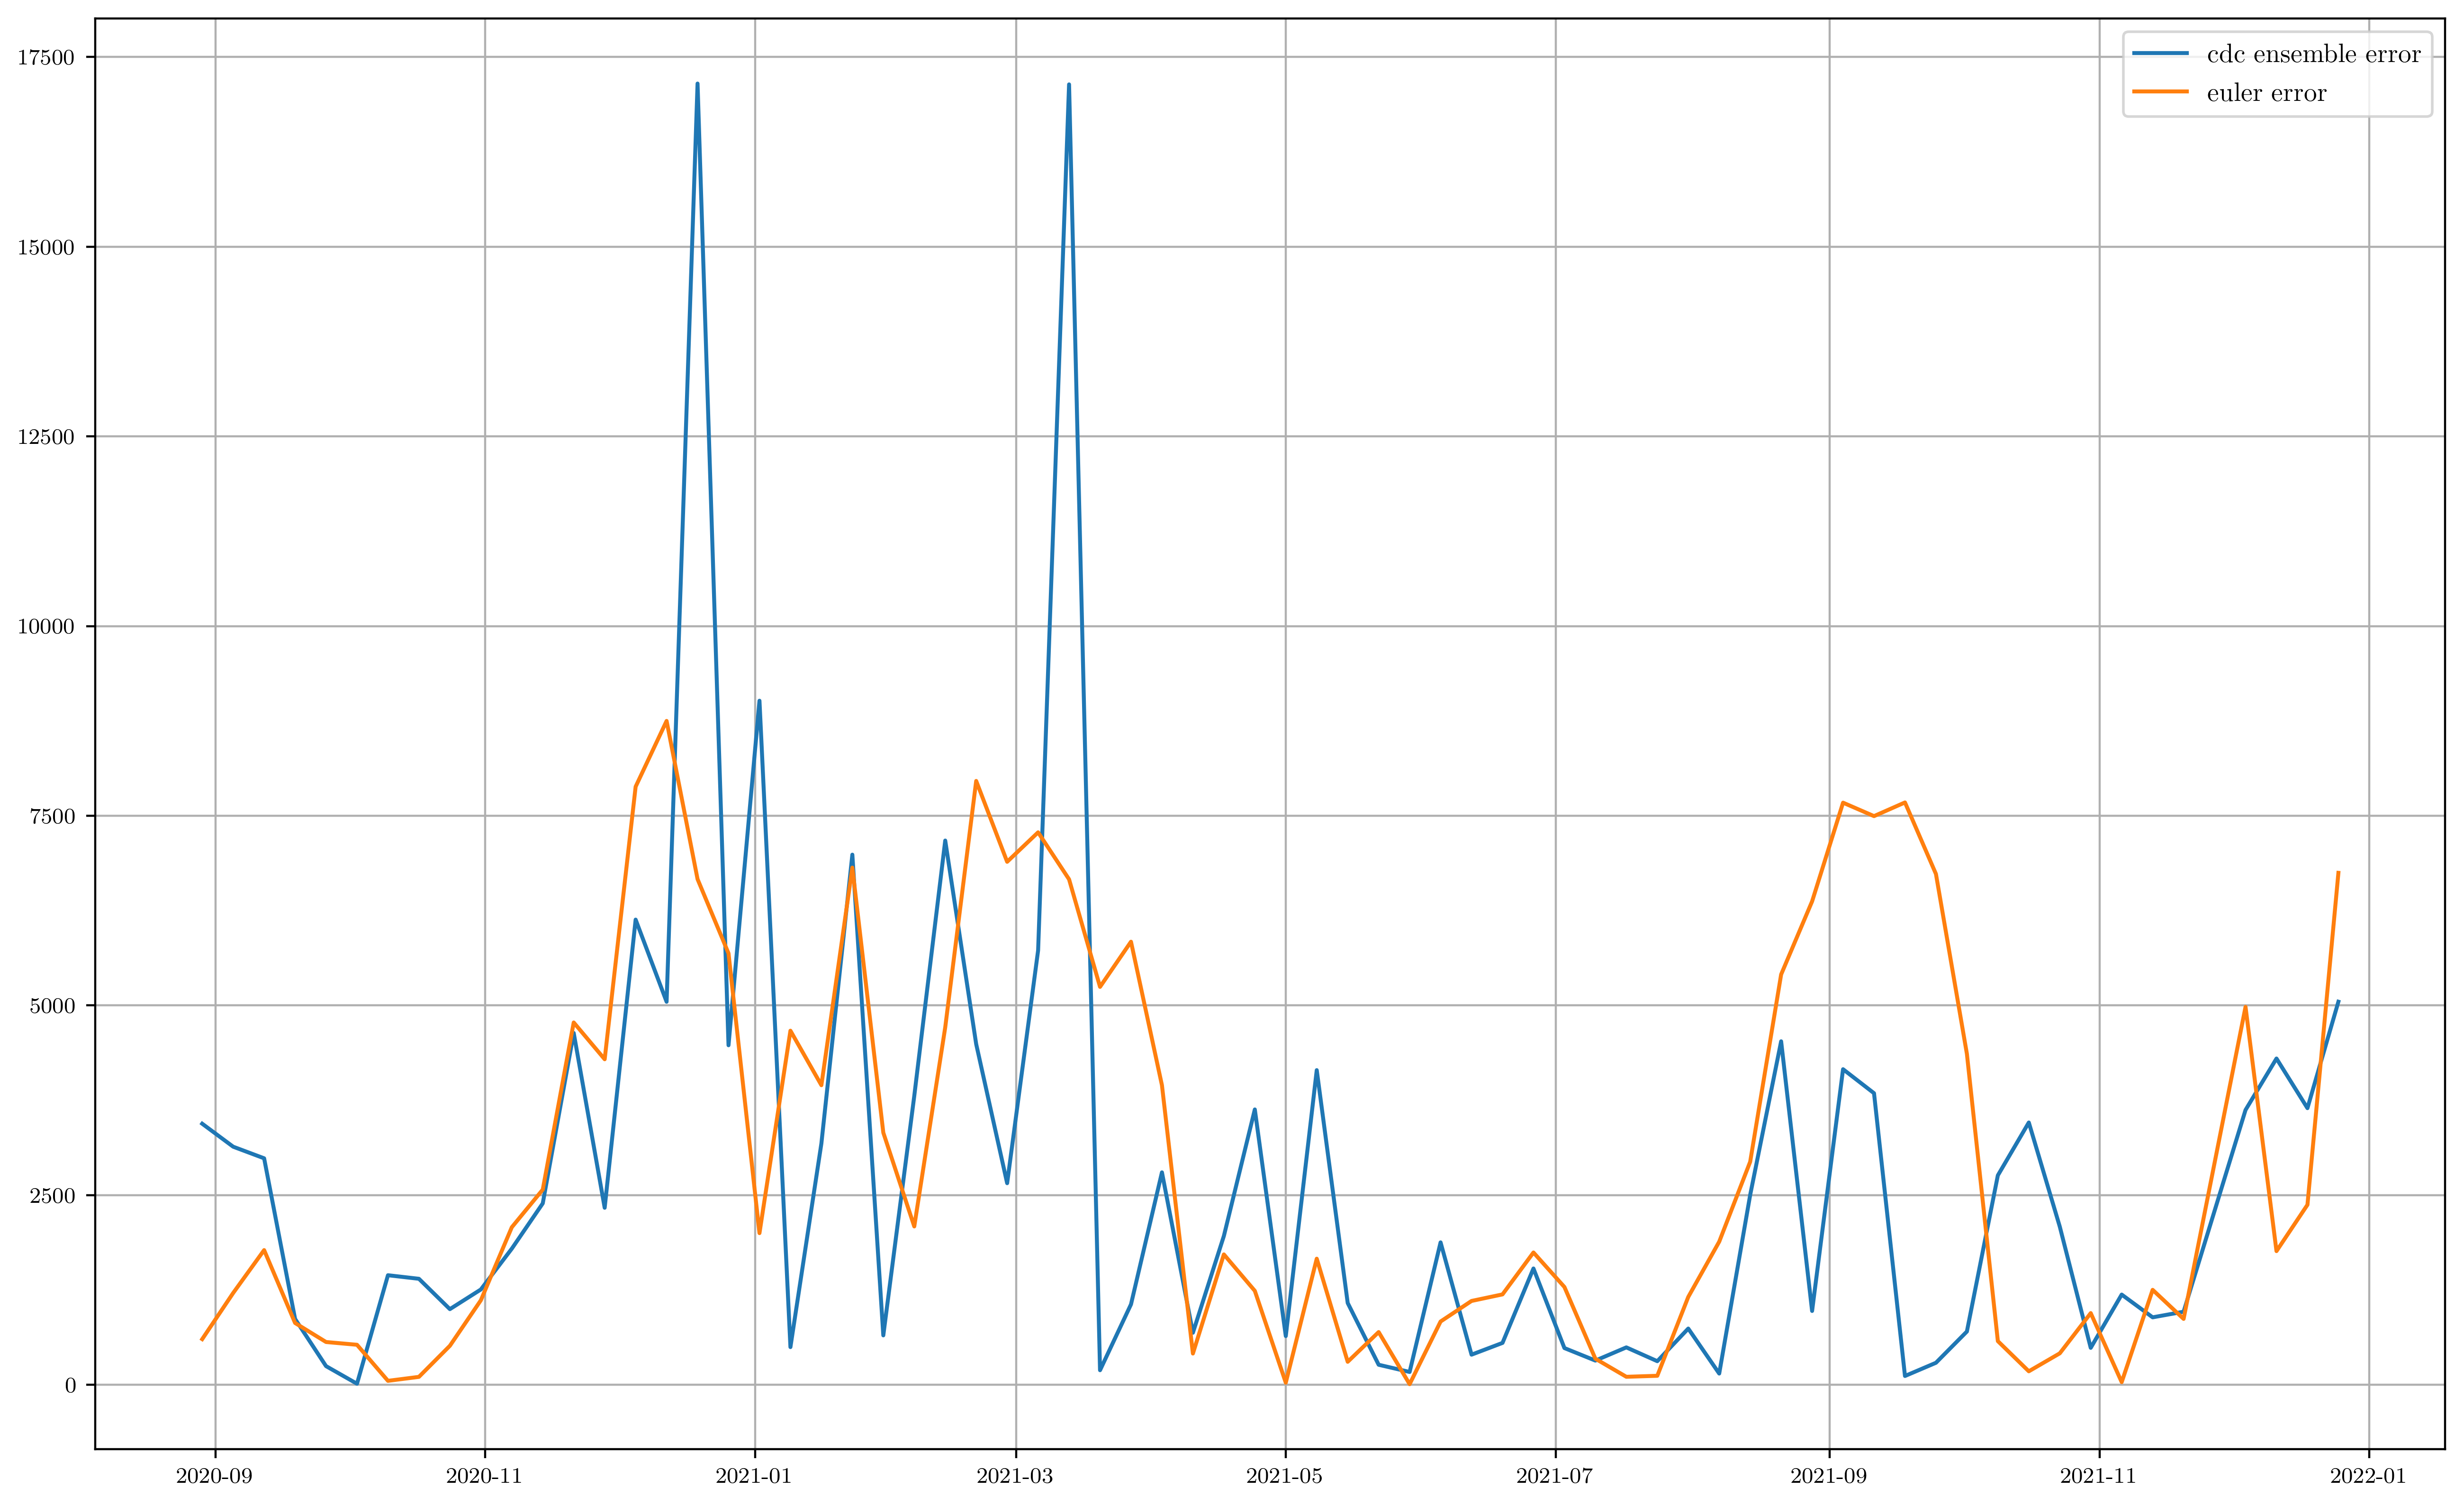

In [111]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=400)

plt.plot(df["target_prediction_date"], df["error_cdc_ensemble"])
plt.plot(df["target_prediction_date"], df["error_euler"])
plt.legend(['cdc ensemble error','euler error'])
plt.grid()
plt.savefig(f'../../{path_results_str}/prediction_error_euler_langrange_week_{week_forecast}.pdf', dpi = 600)

In [112]:
df["error_cdc_ensemble"].sort_values()

5          14
55        116
49        148
39        169
29        192
       ...   
21    6987.03
24       7173
18       9016
28      17139
16      17150
Name: error_cdc_ensemble, Length: 69, dtype: object

In [113]:
df["target_prediction_date"][29]

Timestamp('2021-03-20 00:00:00')

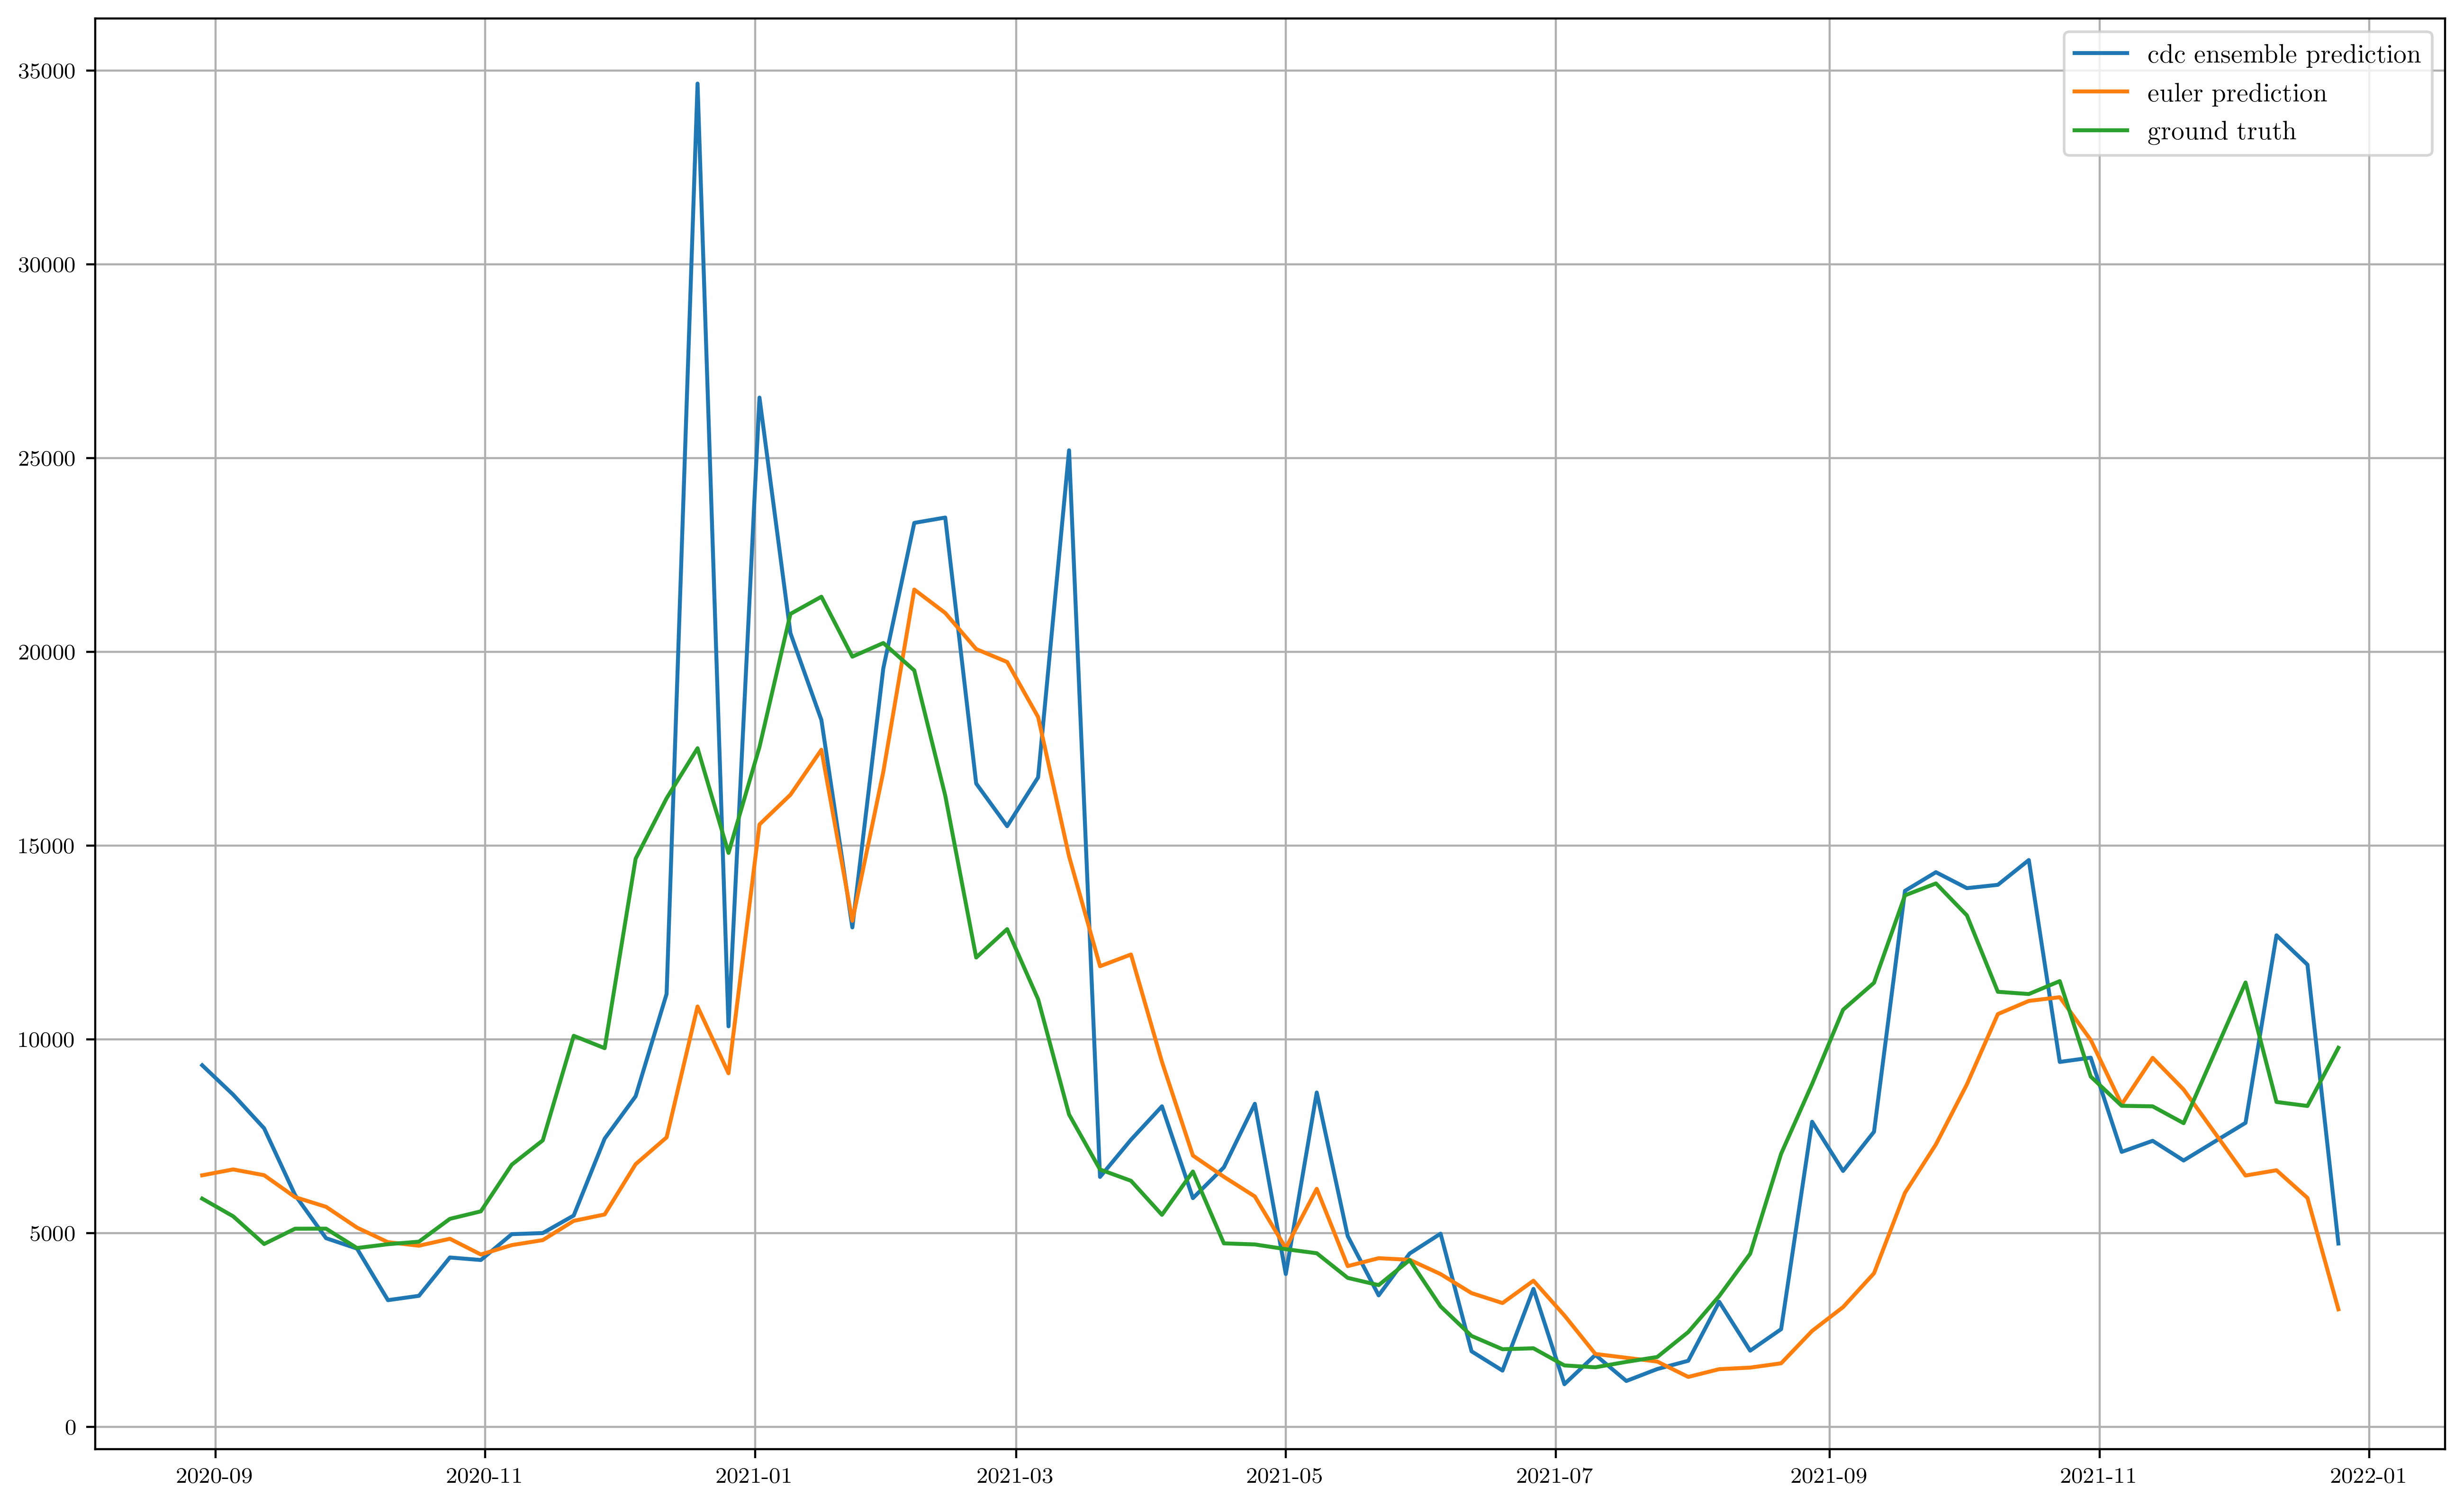

In [114]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=400)

plt.plot(df["target_prediction_date"], df["cdc_prediction_value"])
plt.plot(df["target_prediction_date"], df["euler_prediction_value"])
plt.plot(df["target_prediction_date"], df["ground_truth_incidence"])
plt.legend(['cdc ensemble prediction','euler prediction', 'ground truth'])
plt.grid()
plt.savefig(f'../../{path_results_str}/predictions_euler_langrange_week_{week_forecast}.pdf', dpi = 600)

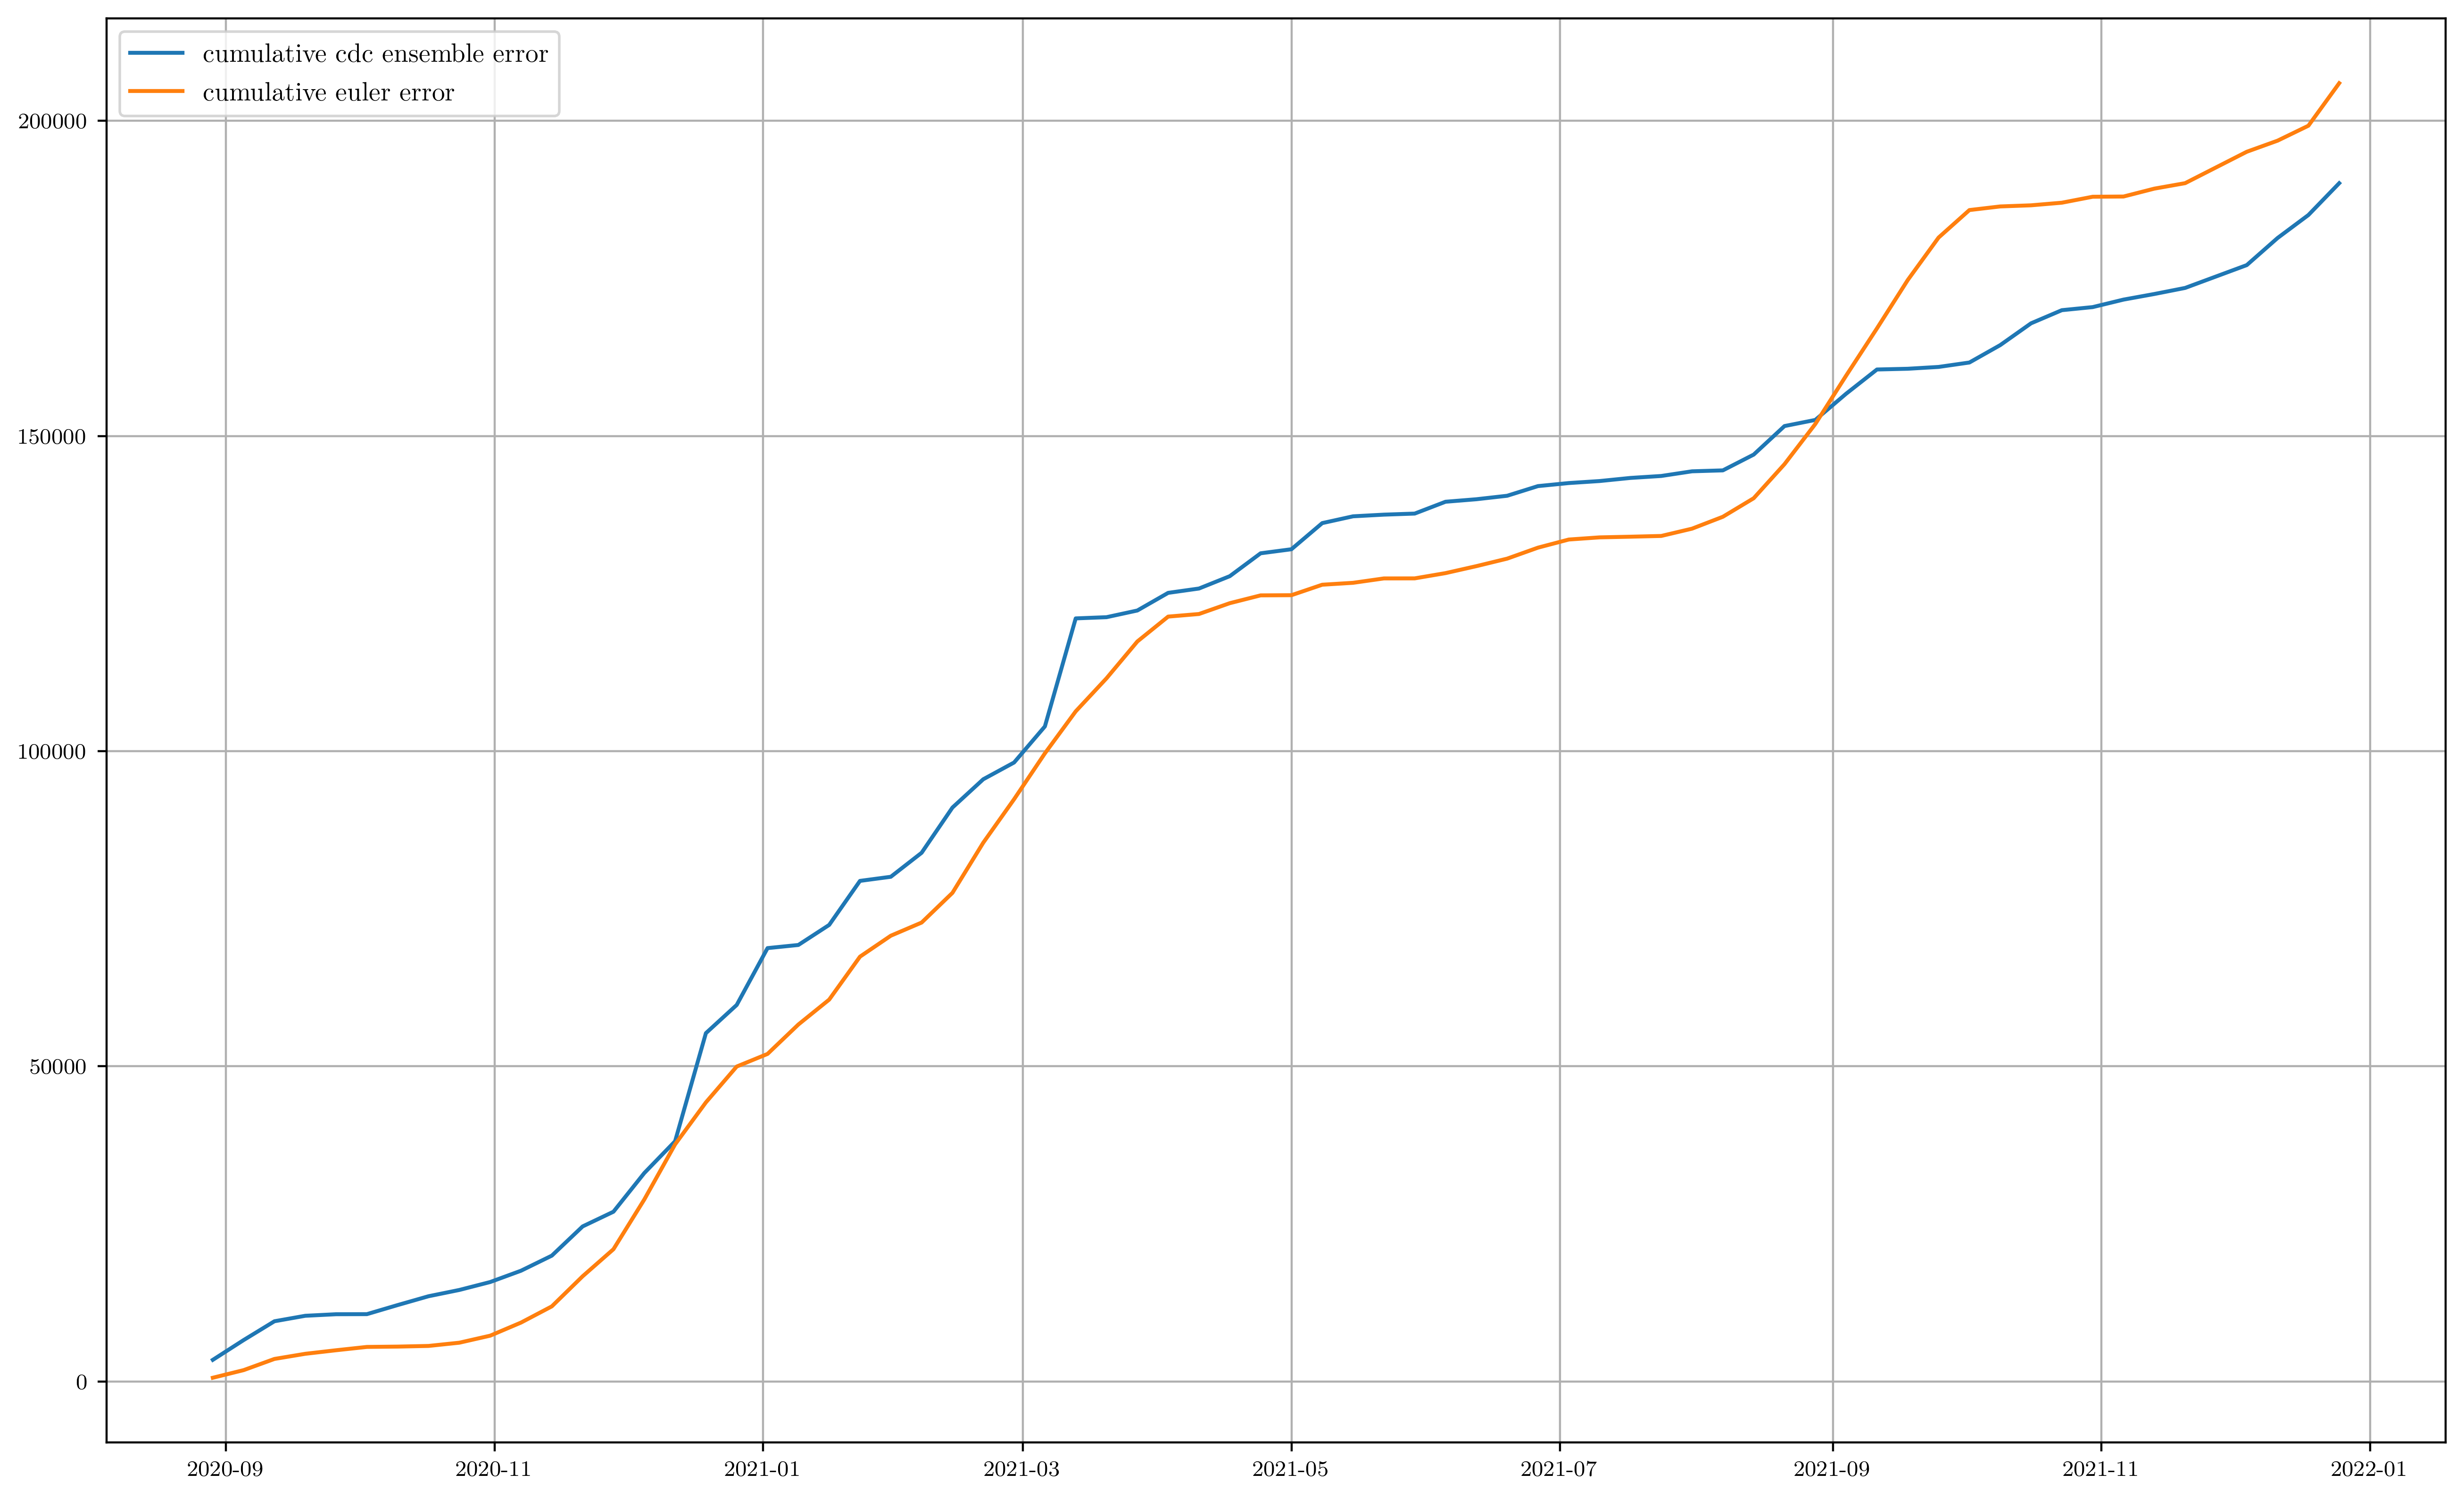

In [115]:
figure(figsize=(16, 10), dpi=400)

plt.plot(df["target_prediction_date"], df["cum_error_cdc_ensemble"])
plt.plot(df["target_prediction_date"], df["cum_error_euler"])
plt.grid()

plt.legend(['cumulative cdc ensemble error','cumulative euler error'])

plt.savefig(f'../../{path_results_str}/cumulative_prediction_error_euler_langrange_week_{week_forecast}.png', dpi = 600)

In [116]:
print("cum cdc error: ", df["cum_error_cdc_ensemble"].iloc[-1])
print("cum euler error: ",  df["cum_error_euler"].iloc[-1])

cum cdc error:  190110.21316666665
cum euler error:  205976.57533542777
